imporrt thư viện 

In [97]:
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import absolute
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn import decomposition # for PCA 
from sklearn import preprocessing
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
df=pd.read_csv('/content/drive/MyDrive/py/Covid Data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


khảo sát data

In [98]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [99]:
df.nunique()

USMER                     2
MEDICAL_UNIT             13
SEX                       2
PATIENT_TYPE              2
DATE_DIED               401
INTUBED                   4
PNEUMONIA                 3
AGE                     121
PREGNANT                  4
DIABETES                  3
COPD                      3
ASTHMA                    3
INMSUPR                   3
HIPERTENSION              3
OTHER_DISEASE             3
CARDIOVASCULAR            3
OBESITY                   3
RENAL_CHRONIC             3
TOBACCO                   3
CLASIFFICATION_FINAL      7
ICU                       4
dtype: int64

In [100]:
for i in df.columns:
		(df[i].value_counts())
perc=[]
for col in list(df.columns):
	perc.append(round(len(df[(df[col]==97)| (df[col]==98) | (df[col]==99)])/len(df)*100,2))
	print(((pd.DataFrame([df.columns,perc]).T).rename(columns={0:"Feature",1:"Percentage"})).sort_values(by="Percentage",ascending=False))

                 Feature Percentage
0                  USMER        0.0
1           MEDICAL_UNIT       None
2                    SEX       None
3           PATIENT_TYPE       None
4              DATE_DIED       None
5                INTUBED       None
6              PNEUMONIA       None
7                    AGE       None
8               PREGNANT       None
9               DIABETES       None
10                  COPD       None
11                ASTHMA       None
12               INMSUPR       None
13          HIPERTENSION       None
14         OTHER_DISEASE       None
15        CARDIOVASCULAR       None
16               OBESITY       None
17         RENAL_CHRONIC       None
18               TOBACCO       None
19  CLASIFFICATION_FINAL       None
20                   ICU       None
                 Feature Percentage
0                  USMER        0.0
1           MEDICAL_UNIT        0.0
2                    SEX       None
3           PATIENT_TYPE       None
4              DATE_DIED    

data visua 

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


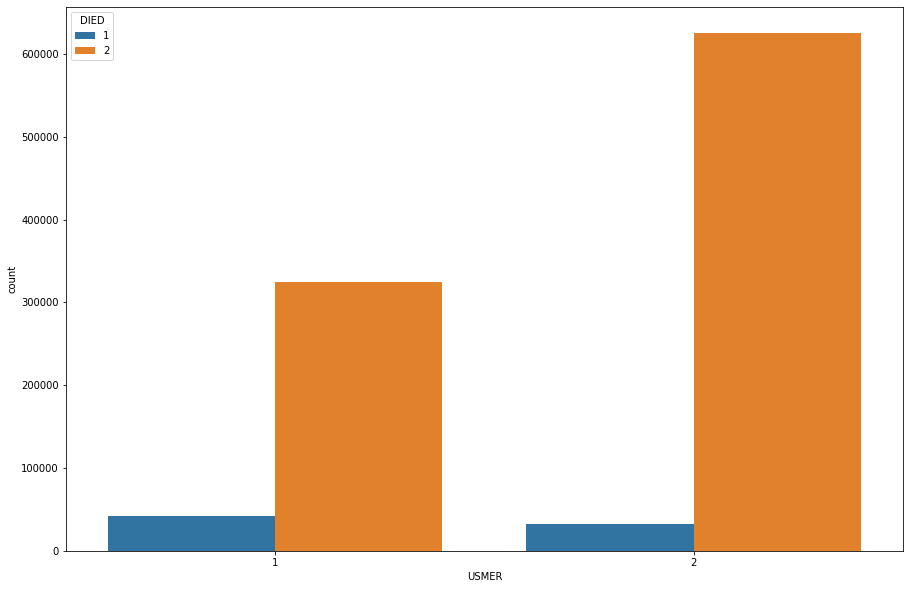

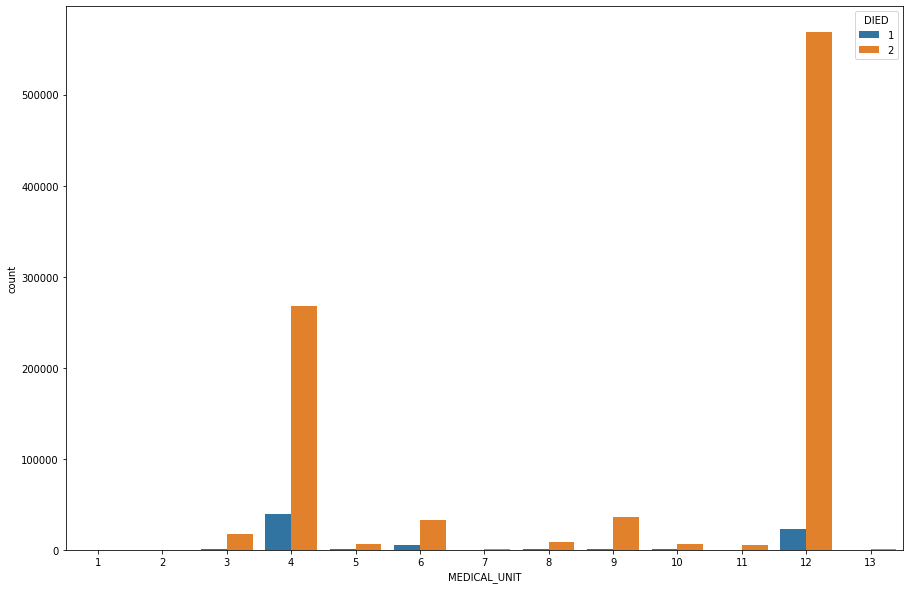

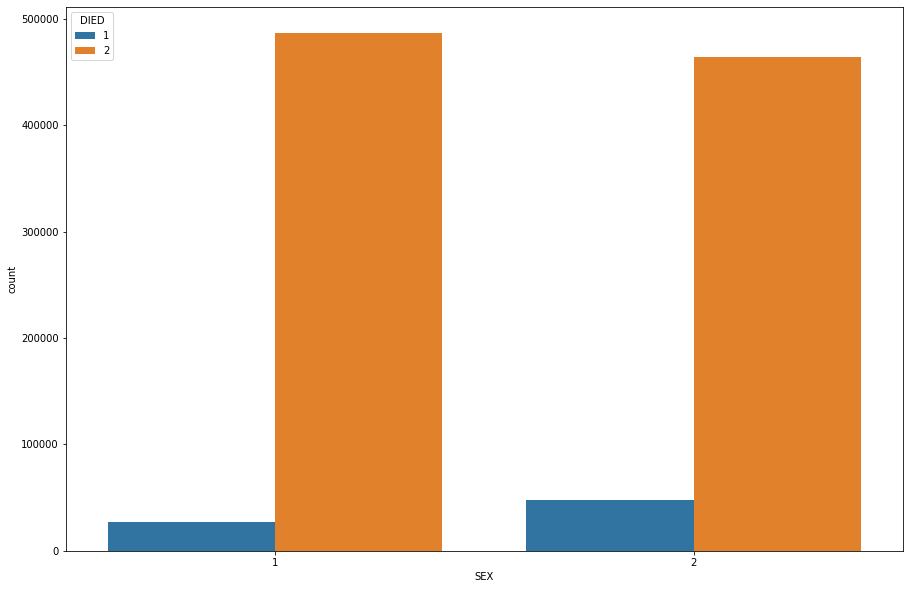

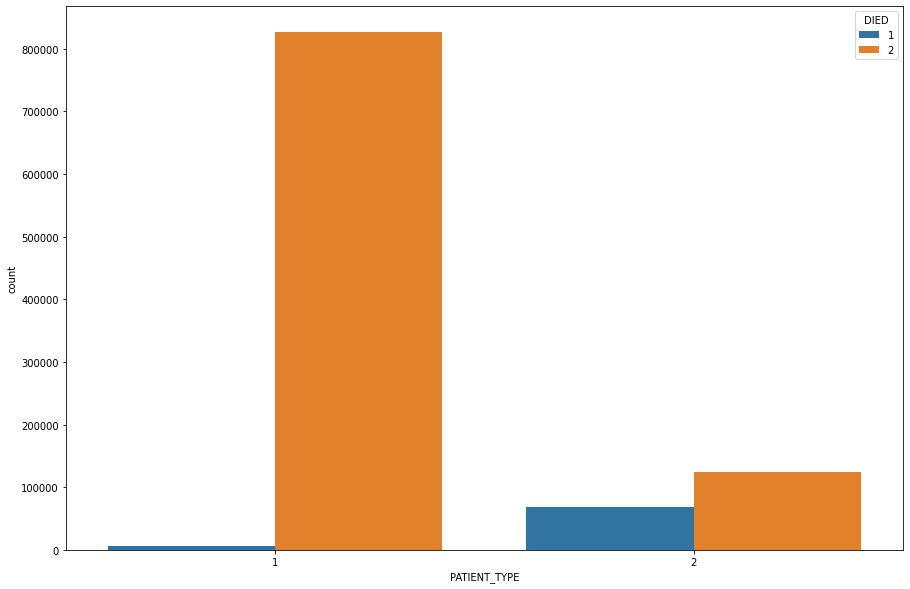

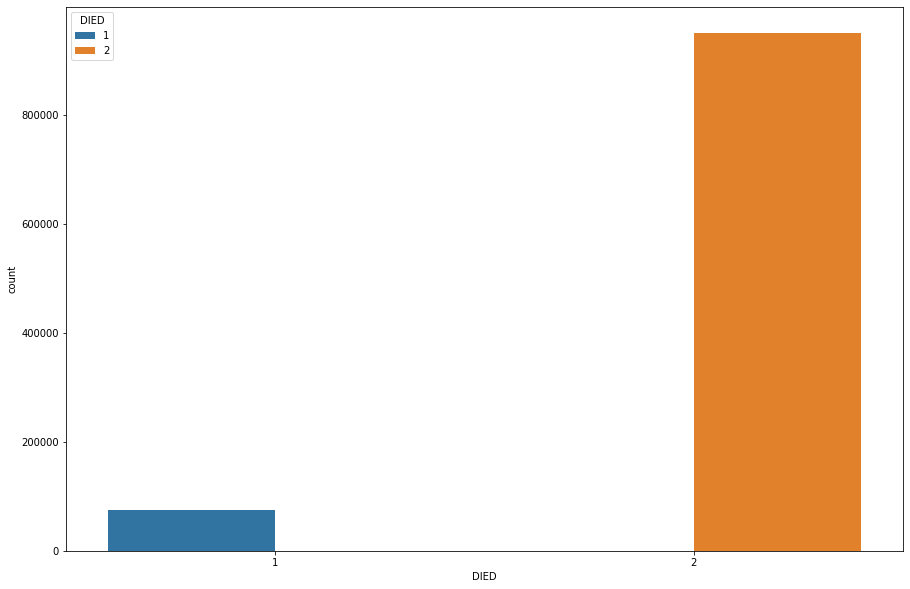

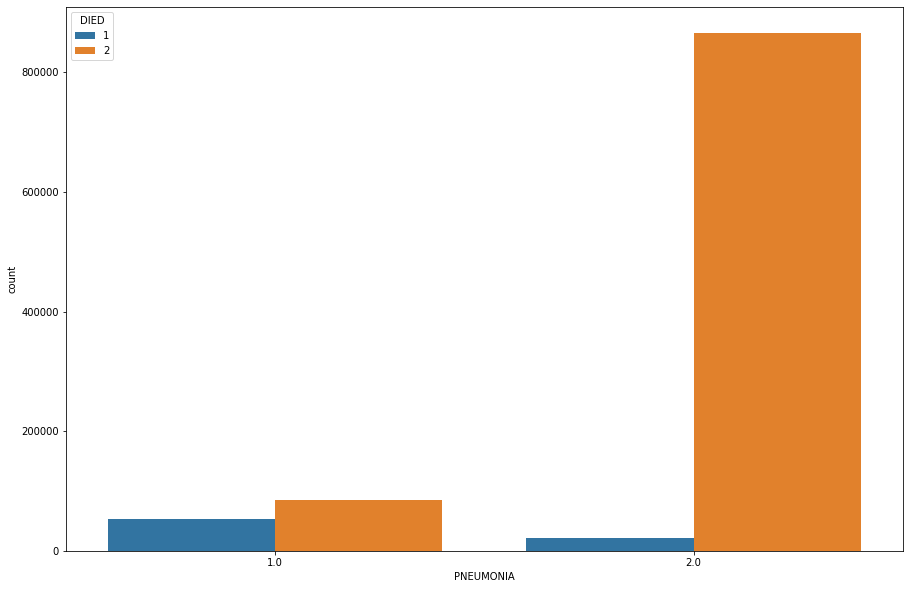

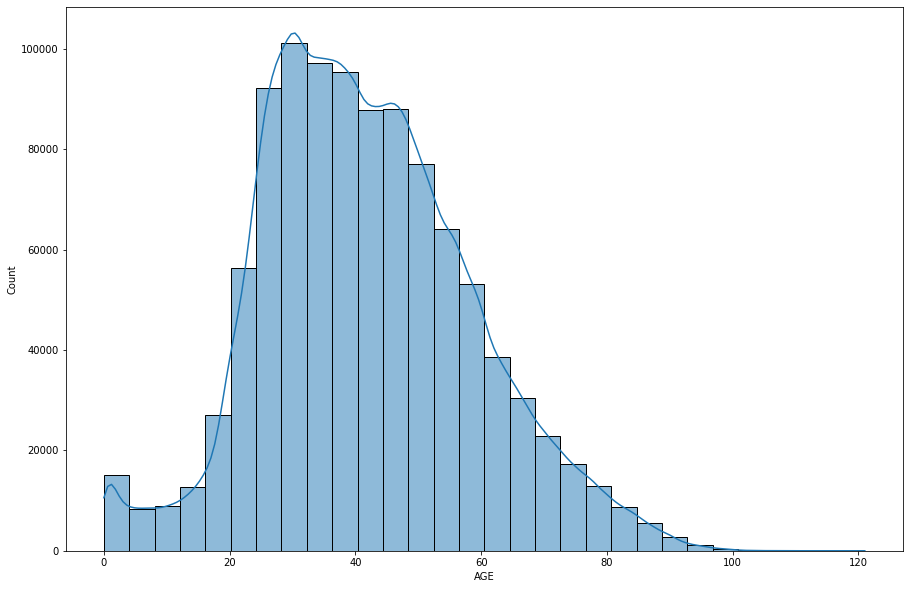

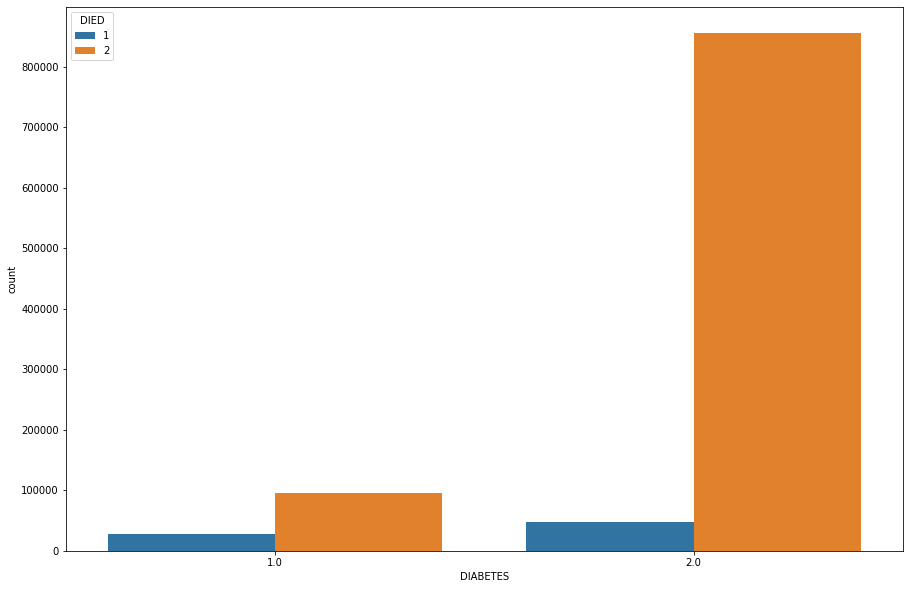

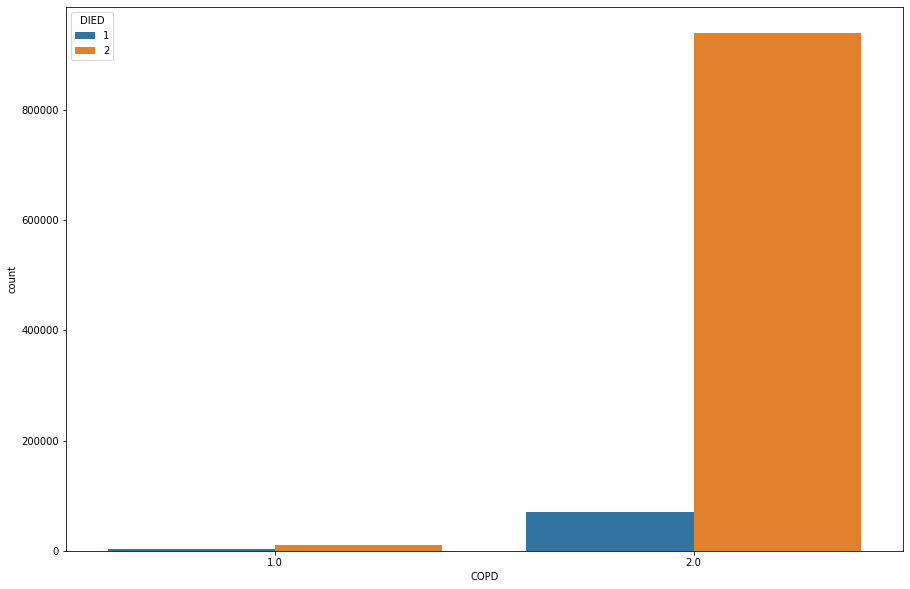

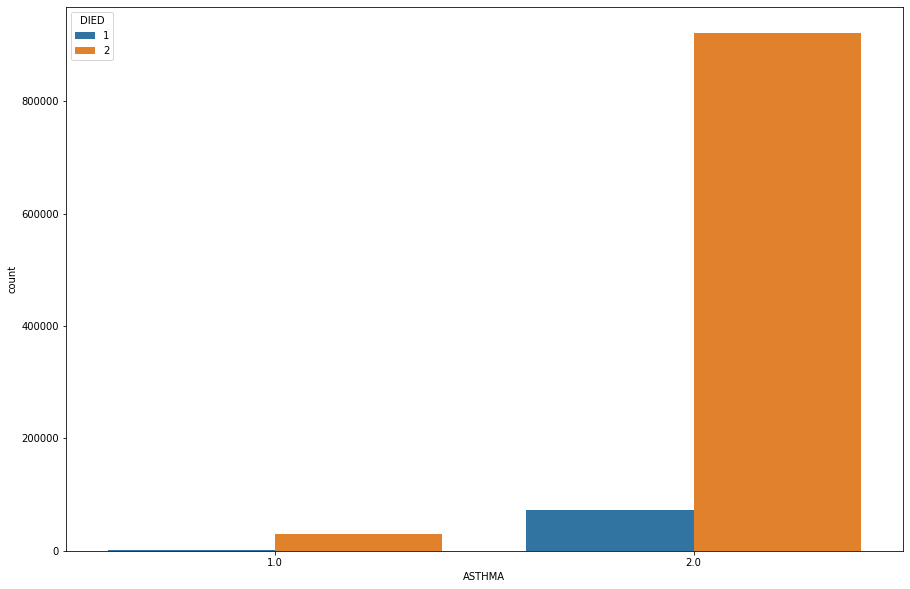

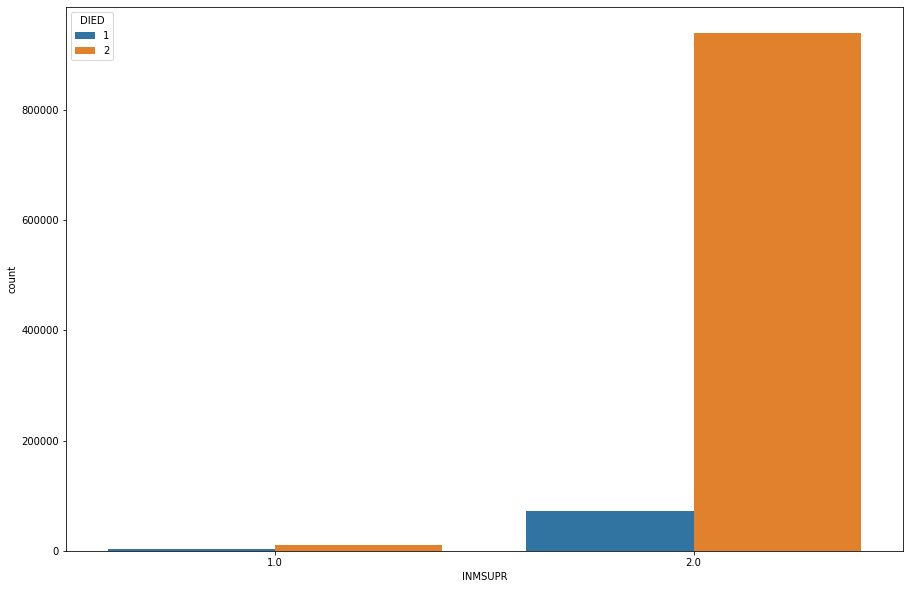

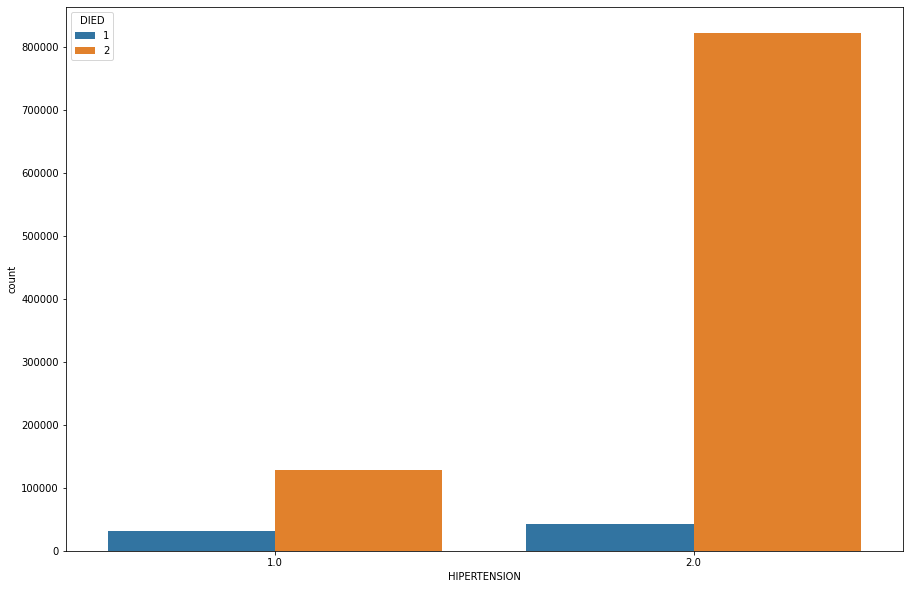

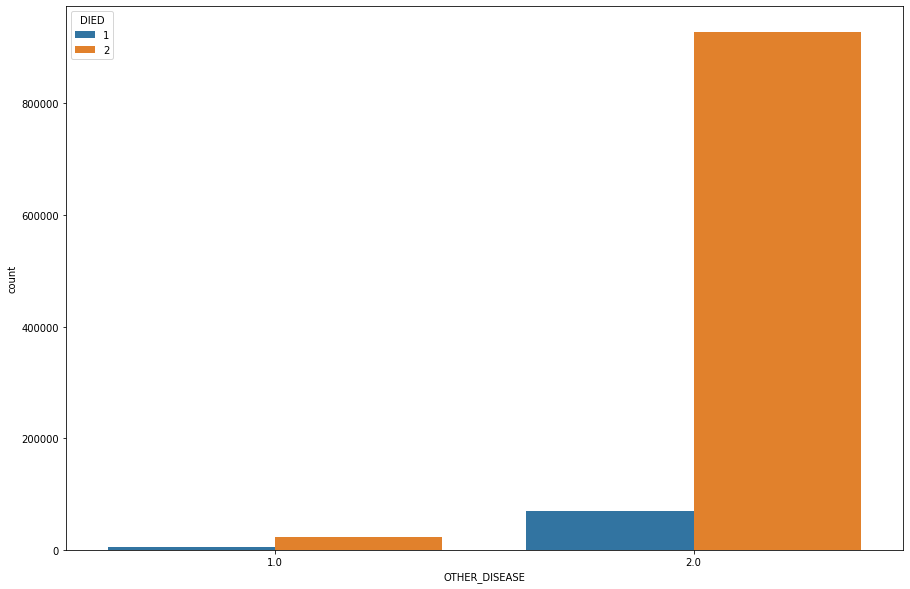

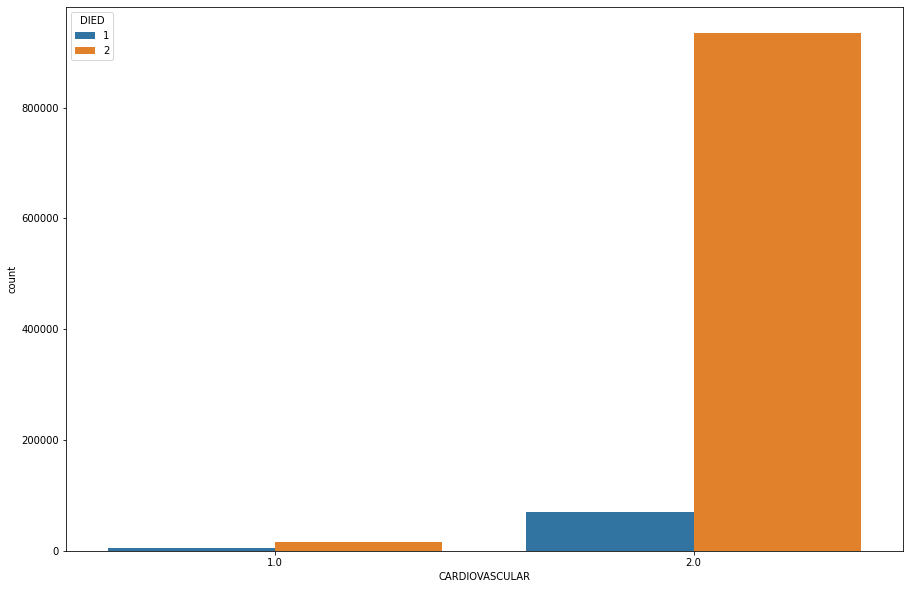

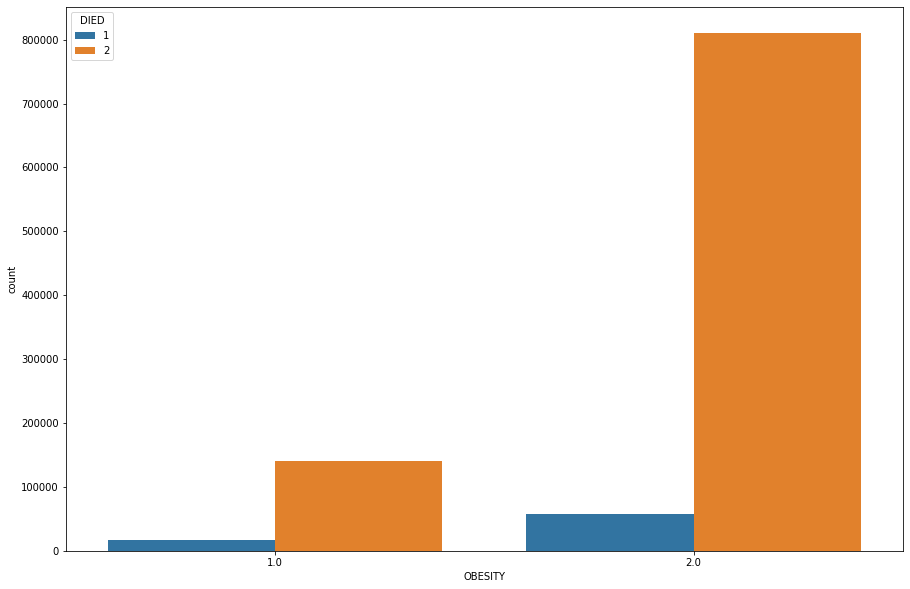

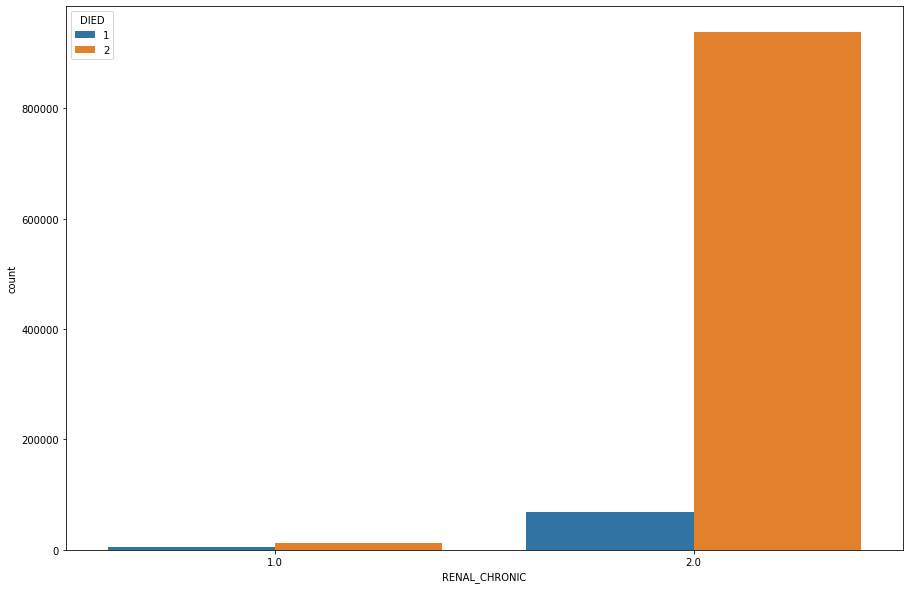

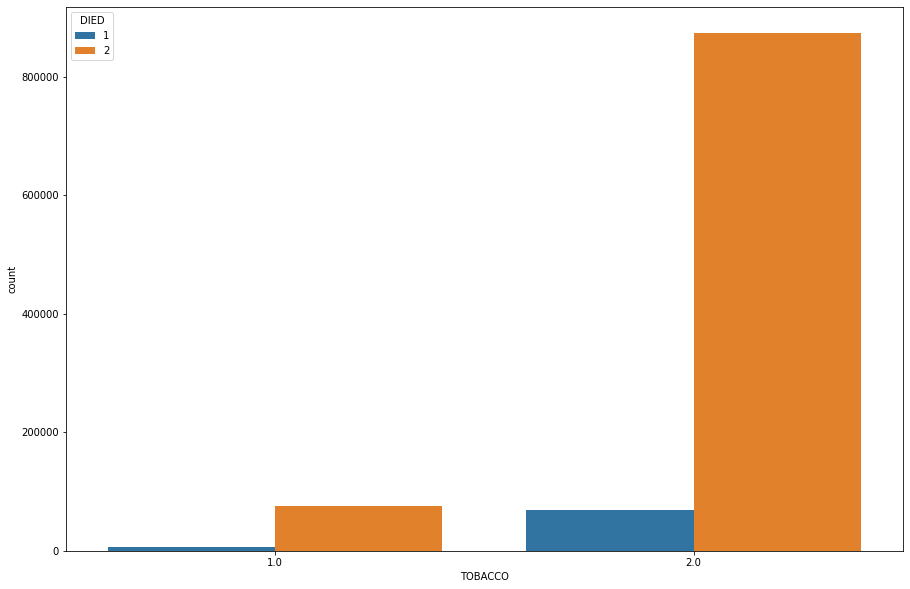

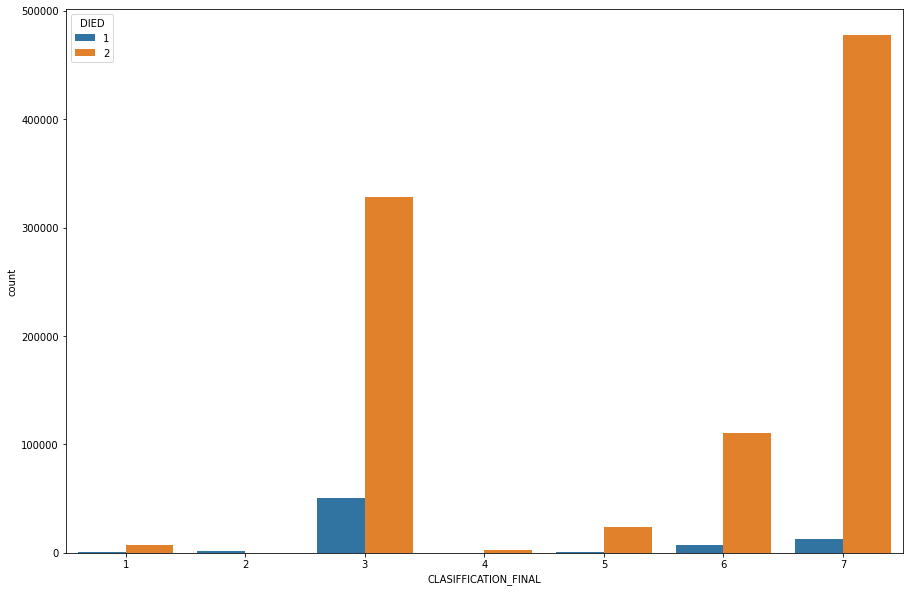

In [101]:
useful_cols=['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED',
		'PNEUMONIA', 'AGE', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
		'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
		'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL']
df=df[useful_cols]
df=df.replace({
	'USMER':{97:np.nan,98:np.nan,99:np.nan},
	'MEDICAL_UNIT':{97:np.nan,98:np.nan,99:np.nan},
	'SEX':{97:np.nan,98:np.nan,99:np.nan}, 
	'PATIENT_TYPE':{97:np.nan,98:np.nan,99:np.nan}, 
	'DATE_DIED':{97:np.nan,98:np.nan,99:np.nan},
	'PNEUMONIA':{97:np.nan,98:np.nan,99:np.nan}, 
	'DIABETES':{97:np.nan,98:np.nan,99:np.nan}, 
	'COPD':{97:np.nan,98:np.nan,99:np.nan}, 
	'ASTHMA':{97:np.nan,98:np.nan,99:np.nan}, 
	'INMSUPR':{97:np.nan,98:np.nan,99:np.nan},
	'HIPERTENSION':{97:np.nan,98:np.nan,99:np.nan}, 
	'OTHER_DISEASE':{97:np.nan,98:np.nan,99:np.nan}, 
	'CARDIOVASCULAR':{97:np.nan,98:np.nan,99:np.nan}, 
	'OBESITY':{97:np.nan,98:np.nan,99:np.nan},
	'RENAL_CHRONIC':{97:np.nan,98:np.nan,99:np.nan}, 
	'TOBACCO':{97:np.nan,98:np.nan,99:np.nan}, 
	'CLASIFFICATION_FINAL':{97:np.nan,98:np.nan,99:np.nan}
	})
df=df.dropna(axis=0)
df.loc[df.DATE_DIED=='9999-99-99','DATE_DIED']=2
df.loc[df.DATE_DIED!=2,'DATE_DIED']=1
df.rename(columns={'DATE_DIED':'DIED'},inplace=True)
X = df.drop(["DIED"],axis=1)
import seaborn as sns
for col in df.columns:
		fig = plt.figure(figsize=(15,10))
		if col == 'AGE':
			sns.histplot(data=df, x=df['AGE'],bins=30, kde=True)
		else:
			sns.countplot(x=df[col],hue=df['DIED'])
		#st.pyplot(fig)

prepocesssing


In [102]:
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/py/Covid Data.csv')
useful_cols=['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED',
		'PNEUMONIA', 'AGE', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
		'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
		'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL']
df=df[useful_cols]
df=df.replace({
	'USMER':{97:np.nan,98:np.nan,99:np.nan},
	'MEDICAL_UNIT':{97:np.nan,98:np.nan,99:np.nan},
	'SEX':{97:np.nan,98:np.nan,99:np.nan}, 
	'PATIENT_TYPE':{97:np.nan,98:np.nan,99:np.nan}, 
	'DATE_DIED':{97:np.nan,98:np.nan,99:np.nan},
	'PNEUMONIA':{97:np.nan,98:np.nan,99:np.nan}, 
	'DIABETES':{97:np.nan,98:np.nan,99:np.nan}, 
	'COPD':{97:np.nan,98:np.nan,99:np.nan}, 
	'ASTHMA':{97:np.nan,98:np.nan,99:np.nan}, 
	'INMSUPR':{97:np.nan,98:np.nan,99:np.nan},
	'HIPERTENSION':{97:np.nan,98:np.nan,99:np.nan}, 
	'OTHER_DISEASE':{97:np.nan,98:np.nan,99:np.nan}, 
	'CARDIOVASCULAR':{97:np.nan,98:np.nan,99:np.nan}, 
	'OBESITY':{97:np.nan,98:np.nan,99:np.nan},
	'RENAL_CHRONIC':{97:np.nan,98:np.nan,99:np.nan}, 
	'TOBACCO':{97:np.nan,98:np.nan,99:np.nan}, 
	'CLASIFFICATION_FINAL':{97:np.nan,98:np.nan,99:np.nan}
	})
df=df.dropna(axis=0)
#df.loc[df.DATE_DIED=='9999-99-99','DATE_DIED']=2
#df.loc[df.DATE_DIED!=2,'DATE_DIED']=1
df.rename(columns={'DATE_DIED':'DIED'},inplace=True)
X = df.drop(["DIED"],axis=1)
#y = df["DIED"]

#input and output 
#X = df.drop('DATE_DIED', axis=1)
#y=df['DEATH']
#dem=len(X.columns)
y= [0 if row=='9999-99-99' else 1 for row in df['DIED']]
#y=X['DEATH']
#X=X.drop('DEATH',axis=1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [103]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeClassifier
my_tree=DecisionTreeClassifier()
my_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [104]:
# độ chính xác mặc định khi chưa tune 
from sklearn.metrics import accuracy_score
y_pred=my_tree.predict(X_test)
print("accuracy :" , accuracy_score(y_test, y_pred))
print("recall:",recall_score(y_test,y_pred))
print("precision :",precision_score(y_test,y_pred))
print("f1_score: ",f1_score(y_test, y_pred, average='weighted'))
print("confusion matrix :" , confusion_matrix(y_test, y_pred))

accuracy : 0.9312591754417625
recall: 0.4400463278375801
precision : 0.5236743959785958
f1_score:  0.9284869630913628
confusion matrix : [[184478   5875]
 [  8219   6459]]


In [76]:
# !!!!!!tiến hành TUNE !!!!
from sklearn.model_selection import GridSearchCV
tune_treeclass={"criterion" :['gini','entropy'],
                #"splitter":['best', 'random'],
                "max_depth":[1,5,9,11,15],
                "min_samples_split":[2,4,8,16],
                "min_samples_leaf":[1,2,4,8,16],
                #"min_weight_fraction_leaf":[0.1,0.2,0.3],
                #"max_features":[],
                #"random_state":[],
                "max_leaf_nodes":[8,16,32,64],
                "min_impurity_decrease":[0,0.001,0.002],
                #"class_weight":[],
                #"ccp_alpha":[0.1,0.2,0.3],
          }
      
tune_dtc=GridSearchCV(my_tree,param_grid=tune_treeclass,scoring='neg_mean_squared_error',cv=2,verbose=3)
tune_dtc.fit(X_train,y_train)

Fitting 2 folds for each of 2400 candidates, totalling 4800 fits
[CV 1/2] END criterion=gini, max_depth=1, max_leaf_nodes=8, min_impurity_decrease=0, min_samples_leaf=1, min_samples_split=2;, score=-0.073 total time=   0.3s
[CV 2/2] END criterion=gini, max_depth=1, max_leaf_nodes=8, min_impurity_decrease=0, min_samples_leaf=1, min_samples_split=2;, score=-0.073 total time=   0.3s
[CV 1/2] END criterion=gini, max_depth=1, max_leaf_nodes=8, min_impurity_decrease=0, min_samples_leaf=1, min_samples_split=4;, score=-0.073 total time=   0.3s
[CV 2/2] END criterion=gini, max_depth=1, max_leaf_nodes=8, min_impurity_decrease=0, min_samples_leaf=1, min_samples_split=4;, score=-0.073 total time=   0.3s
[CV 1/2] END criterion=gini, max_depth=1, max_leaf_nodes=8, min_impurity_decrease=0, min_samples_leaf=1, min_samples_split=8;, score=-0.073 total time=   0.3s
[CV 2/2] END criterion=gini, max_depth=1, max_leaf_nodes=8, min_impurity_decrease=0, min_samples_leaf=1, min_samples_split=8;, score=-0.073 

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 5, 9, 11, 15],
                         'max_leaf_nodes': [8, 16, 32, 64],
                         'min_impurity_decrease': [0, 0.001, 0.002],
                         'min_samples_leaf': [1, 2, 4, 8, 16],
                         'min_samples_split': [2, 4, 8, 16]},
             scoring='neg_mean_squared_error', verbose=3)

In [107]:
print(tune_dtc.best_params_)
print(tune_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 9, 'max_leaf_nodes': 64, 'min_impurity_decrease': 0, 'min_samples_leaf': 1, 'min_samples_split': 2}
-0.06005089524569057


In [106]:
tune_dtc.cv_results_

{'mean_fit_time': array([0.2760942 , 0.26691353, 0.27339041, ..., 0.54516685, 0.55148542,
        0.52373183]),
 'std_fit_time': array([0.01865911, 0.00369203, 0.01114333, ..., 0.00979245, 0.00058806,
        0.00494611]),
 'mean_score_time': array([0.0452764 , 0.046363  , 0.04508746, ..., 0.04848123, 0.04910648,
        0.04633737]),
 'std_score_time': array([0.00011063, 0.00095451, 0.00028074, ..., 0.00079203, 0.00177276,
        0.00077891]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', ..., 'entropy', 'entropy',
                    'entropy'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[1, 1, 1, ..., 15, 15, 15],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_leaf_nodes': masked_array(data=[8, 8, 8, ..., 64, 64, 64],
              mask=[False, False, False, ..., False

In [1]:
df_re = pd.DataFrame(tune_dtc.cv_results_)

NameError: ignored

In [ ]:
df_re

accuracy : 0.9314591452024328
recall: 0.44222646137075894
precision : 0.5252893097030024
f1_score:  0.928724637589885
confusion matrix : [[184487   5866]
 [  8187   6491]]
TUN
accuracy tuned  : 0.9404968029224849
recall tuned : 0.44774492437661806
precision tuned : 0.6161635102193888
f1_score tuned :  0.9360973343793401
confusion matrix tuned :
[[186259   4094]
 [  8106   6572]]


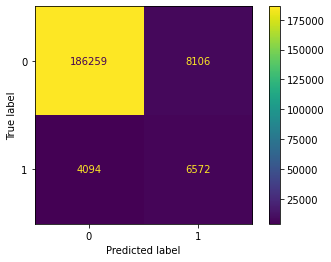

In [130]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
my_tree=DecisionTreeClassifier()
my_tree.fit(X_train,y_train)
y_pred=my_tree.predict(X_test)
notun=[]
print("accuracy :" , accuracy_score(y_test, y_pred))
notun.append(accuracy_score(y_test, y_pred))
print("recall:",recall_score(y_test,y_pred))
notun.append(recall_score(y_test,y_pred))
print("precision :",precision_score(y_test,y_pred))
notun.append(precision_score(y_test,y_pred))
print("f1_score: ",f1_score(y_test, y_pred, average='weighted'))
notun.append(f1_score(y_test, y_pred, average='weighted'))
print("confusion matrix :" , confusion_matrix(y_test, y_pred))
my_tree=DecisionTreeClassifier(criterion='gini',max_depth=9  ,max_leaf_nodes=64, min_samples_leaf= 16,
min_samples_split= 2)

my_tree.fit(X_train,y_train)
y_pred=my_tree.predict(X_test)
print("TUN")
tun=[]
print("accuracy tuned  :" , accuracy_score(y_test, y_pred))
tun.append( accuracy_score(y_test, y_pred))
print("recall tuned :",recall_score(y_test,y_pred))
tun.append(recall_score(y_test,y_pred))
print("precision tuned :",precision_score(y_test,y_pred))
tun.append(precision_score(y_test,y_pred))
print("f1_score tuned : ",f1_score(y_test, y_pred, average='weighted'))
tun.append(f1_score(y_test,y_pred,average='weighted'))
print("confusion matrix tuned :")
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix(y_pred, y_test))
disp = disp.plot()

In [126]:
tun

[0.9404968029224849,
 0.44774492437661806,
 0.6161635102193888,
 0.5186237373737375]

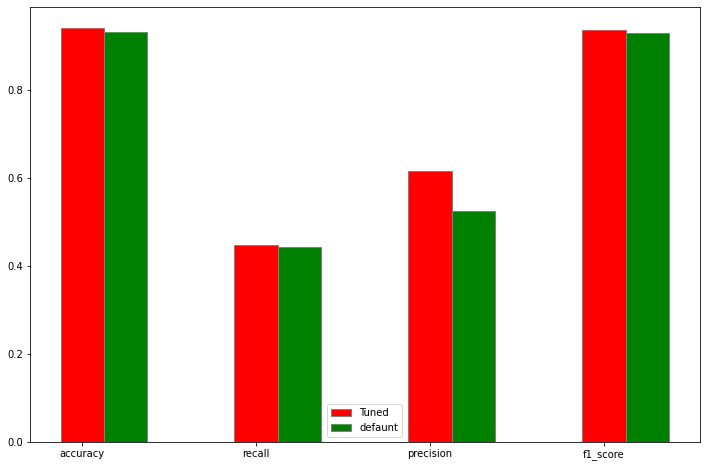

In [128]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# Set position of bar on X axis
br1 = np.arange(len(tun))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br2, tun, color ='r', width = barWidth,
        edgecolor ='grey', label ='Tuned')
plt.bar(br3, notun, color ='g', width = barWidth,
        edgecolor ='grey', label ='defaunt')
#plt.bar(br3, CSE, color ='b', width = barWidth,
        #edgecolor ='grey', label ='CSE')
 
# Adding Xticks
plt.xlabel('', fontweight ='bold', fontsize = 15)
plt.ylabel('', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(tun))],
        ['accuracy', 'recall', 'precision', 'f1_score', '2019'])
 
plt.legend()
plt.show()

prunning with ccp_alphas 

In [38]:
from pathlib import Path  
filepath = Path('/content/drive/MyDrive/py/out.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_re.to_csv(filepath)  


In [46]:
path = my_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

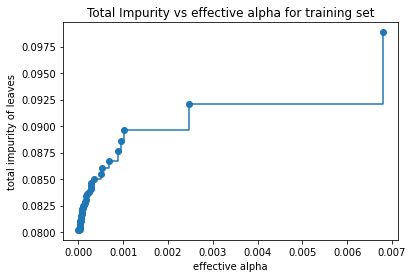

In [47]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")


In [50]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion='gini',max_depth=9  ,max_leaf_nodes=64, min_samples_leaf= 1,
min_samples_split= 2,random_state=0,ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)


Number of nodes in the last tree is: 1 with ccp_alpha: 0.03683328085082943


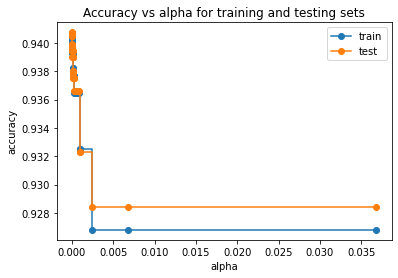

In [51]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [110]:
my_tree=DecisionTreeClassifier(criterion='gini',max_depth=9  ,max_leaf_nodes=64, min_samples_leaf= 1,
min_samples_split= 2,ccp_alpha=0.00)

my_tree.fit(X_train,y_train)
y_pred=my_tree.predict(X_test)
print("tuned: ",accuracy_score(y_test, y_pred))
print("tuned:",precision_score(y_test,y_pred))
print("tuned:",recall_score(y_test,y_pred))
print("tuned,",confusion_matrix(y_test, y_pred))

tuned:  0.9404968029224849
tuned: 0.6161635102193888
tuned: 0.44774492437661806
tuned, [[186259   4094]
 [  8106   6572]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
marks=[79,45,22,89,95]
bars=('Roll 1','Roll 2','Roll 3','Roll 4','Roll 5')
y=np.arange(len(bars))
plt.bar(y,marks,color='g')